In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Đọc dữ liệu vào df_A Tạo 2 dataframe df_train, df_test từ df_train df_train: 80% ngẫu nhiên được lấy từ df_A df_test: 20% còn lại

df_A = pd.read_csv('./exFuelConsumption.csv')
df_A.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2014,ACURA,ILX,2.0,4,9.9,196
1,2014,ACURA,ILX,2.4,4,11.2,221
2,2014,ACURA,ILX HYBRID,1.5,4,6.0,136
3,2014,ACURA,MDX 4WD,3.5,6,12.7,255
4,2014,ACURA,RDX AWD,3.5,6,12.1,244


In [3]:
df_train = df_A.sample(frac = 0.8)
df_train.head()


,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
737,2014,MERCEDES-BENZ,CLS 63 AMG 4MATIC,5.5,8,15.1,301
416,2014,FORD,MUSTANG,3.7,6,12.1,235
113,2014,BMW,ACTIVEHYBRID 3,3.0,6,9.2,191
483,2014,HONDA,ACCORD,2.4,4,10.1,200
471,2014,GMC,YUKON 4WD,5.3,8,16.0,317


In [4]:
df_test = df_A[~df_A.isin(df_train)].dropna()
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2014.0,ACURA,ILX,2.0,4.0,9.9,196.0
8,2014.0,ACURA,TL AWD,3.7,6.0,13.4,267.0
13,2014.0,ASTON MARTIN,RAPIDE,5.9,12.0,18.0,359.0
33,2014.0,AUDI,A8L,3.0,6.0,13.1,258.0
34,2014.0,AUDI,A8L,4.0,8.0,14.7,288.0


In [5]:
from numpy import linalg

# 2. Sử dụng ma trận giả đảo để dự báo CO2 Emission theo 3 features Enginesize, Cylinders, FuelConsumption theo từng bước sau:
X = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
737,5.5,8,15.1
416,3.7,6,12.1
113,3.0,6,9.2
483,2.4,4,10.1
471,5.3,8,16.0


In [6]:
X_inv = linalg.pinv(X)
X_inv

array([[ 0.0032487 ,  0.0007699 , -0.00128242, ..., -0.00358476,
        -0.0001316 ,  0.0002889 ],
       [-0.00026378,  0.00032597,  0.00241734, ...,  0.00168251,
        -0.0003806 , -0.00052715],
       [-0.0006264 , -0.00026385, -0.00065463, ...,  0.00025155,
         0.00026047,  0.00024303]])

In [7]:
y = df_train['CO2EMISSIONS']
y.head()

737    301
416    235
113    191
483    200
471    317
Name: CO2EMISSIONS, dtype: int64

In [8]:
w = X_inv @ y
w

array([-8.33783289, 20.98666958, 11.94352754])

In [9]:
w_engine_size = w[0]
w_cylinders = w[1]
w_fuel_consumption = w[2]

In [10]:
df_test['prediction_1'] = df_test['ENGINESIZE']*w_engine_size + df_test['CYLINDERS']*w_cylinders + df_test['FUELCONSUMPTION_CITY']*w_fuel_consumption
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,prediction_1
0,2014.0,ACURA,ILX,2.0,4.0,9.9,196.0,185.511935
8,2014.0,ACURA,TL AWD,3.7,6.0,13.4,267.0,255.113305
13,2014.0,ASTON MARTIN,RAPIDE,5.9,12.0,18.0,359.0,417.630317
33,2014.0,AUDI,A8L,3.0,6.0,13.1,258.0,257.366730
34,2014.0,AUDI,A8L,4.0,8.0,14.7,288.0,310.111880


<AxesSubplot:>

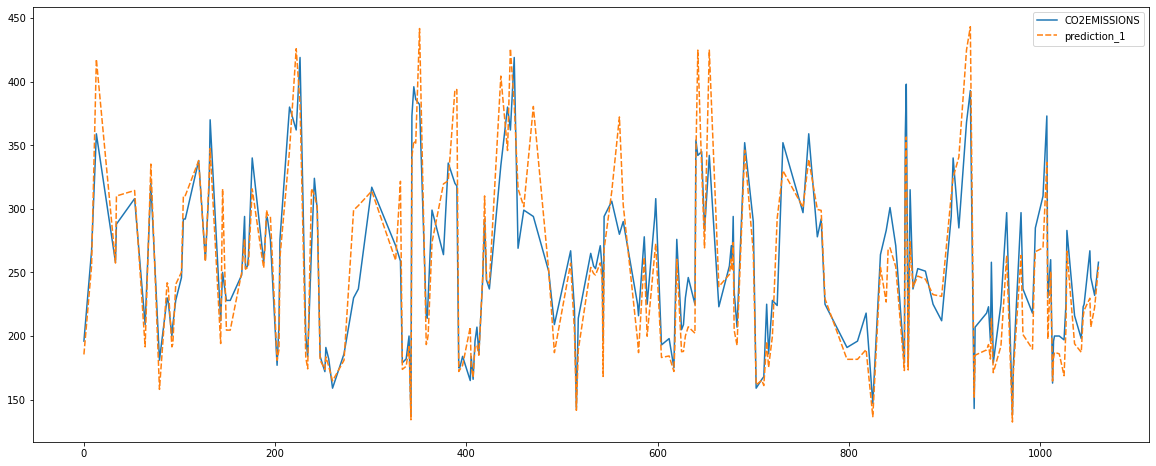

In [11]:
plt.figure(figsize=(20,8))
df_co2_pre_1 = df_test[['CO2EMISSIONS', 'prediction_1']]
sns.lineplot(data=df_co2_pre_1)

In [12]:
import sympy

x = sympy.Symbol('x')
y = sympy.Symbol('y')
z = sympy.Symbol('z')
theta = np.ones(4)
t = np.dot(np.array([1, x, y, z]), theta)
t


1.0*x + 1.0*y + 1.0*z + 1.0

In [13]:
# 3. Sử dụng Gradient Descent với 3 features Enginesize, Cylinders, FuelConsumption tính CO2 Emission
def gradient_descent_3(alpha, x, y, numIterations):
    m = x.shape[0]
    print('m:', m)
    theta = np.ones(x.shape[1])
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        theta0_prime = np.sum(loss)/m
        theta1_prime = np.sum(loss * x[:, 1])/m
        theta2_prime = np.sum(loss * x[:, 2])/m
        theta3_prime = np.sum(loss * x[:, 3])/m

        gradient = np.array([theta0_prime, theta1_prime, theta2_prime, theta3_prime])
        theta = theta - alpha * gradient
        if iter == 0:
            print('hypothesis:\n', hypothesis)
            print('loss:\n', loss)
            print('gradient:\n', gradient)
            print('theta:\n', theta)
    return theta

In [14]:
alpha = 0.00002
m, n = np.shape(X)
print('m', m)
print('n', n)
X = df_train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY']]
print('X', X)
x = np.c_[np.ones(m), X]
print('x', x)
y = df_train['CO2EMISSIONS']
print('y', y)
theta = gradient_descent_3(alpha, x, y, 1000)

print('final theta', theta)

m 854
n 3
X      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY
737         5.5          8                  15.1
416         3.7          6                  12.1
113         3.0          6                   9.2
483         2.4          4                  10.1
471         5.3          8                  16.0
..          ...        ...                   ...
422         2.0          4                  10.5
55          3.0          6                  13.2
142         1.4          4                   9.5
316         2.4          4                  10.5
383         3.7          6                  15.0

[854 rows x 3 columns]
x [[ 1.   5.5  8.  15.1]
 [ 1.   3.7  6.  12.1]
 [ 1.   3.   6.   9.2]
 ...
 [ 1.   1.4  4.   9.5]
 [ 1.   2.4  4.  10.5]
 [ 1.   3.7  6.  15. ]]
y 737    301
416    235
113    191
483    200
471    317
      ... 
422    209
55     262
142    196
316    202
383    308
Name: CO2EMISSIONS, Length: 854, dtype: int64
m: 854
hypothesis:
 [29.6 22.8 19.2 17.5 30.3 22.7 38.9 16.6 

In [15]:
theta_zero = theta[0]
theta_engine_size = theta[1]
theta_cylinders = theta[2]
theta_fuel_consumption = theta[3]

df_test['prediction_2'] = df_test['ENGINESIZE']*theta_engine_size + df_test['CYLINDERS']*theta_cylinders + df_test['FUELCONSUMPTION_CITY']*theta_fuel_consumption + theta_zero
df_test.head()

,MODELYEAR,MAKE,MODEL,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,prediction_1,prediction_2
0,2014.0,ACURA,ILX,2.0,4.0,9.9,196.0,185.511935,181.790231
8,2014.0,ACURA,TL AWD,3.7,6.0,13.4,267.0,255.113305,253.892239
13,2014.0,ASTON MARTIN,RAPIDE,5.9,12.0,18.0,359.0,417.630317,372.131024
33,2014.0,AUDI,A8L,3.0,6.0,13.1,258.0,257.366730,246.432074
34,2014.0,AUDI,A8L,4.0,8.0,14.7,288.0,310.111880,288.000254
